# Stock market Prediction

Importing top 20 different stocks data from 2020-2025 through yfinance for thie initial phase of analysis and will later develop in larger scale

In [3]:
import yfinance as yf
import pandas as pd

stocks = ["AAPL", "MSFT", "NVDA", "GOOGL", "META", "JPM", "GS", "V", "JNJ", "PFE",
          "XOM", "TSLA", "AMZN", "KO", "MCD", "SPY", "QQQ"]

# Define the time range
start_date = "2020-03-10"
end_date = "2025-03-10"

# Fetch data for all stocks
stock_data = yf.download(stocks, start=start_date, end=end_date)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  17 of 17 completed


# DATA RXPLORATION

In [4]:
stock_data

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL          GS         JNJ   
Date                                                                     
2020-03-10   69.246025   94.591003   63.455124  163.302704  123.095879   
2020-03-11   66.841095   91.042999   60.256912  152.265274  114.544174   
2020-03-12   60.240208   83.830498   55.313049  133.476822  108.990791   
2020-03-13   67.457481   89.250000   60.424614  156.942459  116.708168   
2020-03-16   58.779285   84.457497   53.394722  137.002426  110.485596   
...                ...         ...         ...         ...         ...   
2025-03-03  238.029999  205.020004  166.817871  605.260010  167.279999   
2025-03-04  235.929993  203.800003  170.723373  581.140015  165.419998   
2025-03-05  235.740005  208.360001  172.820969  593.070007  165.119995   
2025-03-06  235.330002  200.699997  172.151733  567.669983  165.830002   
2025-03-07  239.070007  199.250000  173.660004  559.669983  166.690002   

Price                                                                  ...  \
Ticker             JPM         KO         MCD        META        MSFT  ...   
Date                                                                   ...   
2020-03-10   87.258400  45.955688  178.098465  177.511917  154.029175  ...   
2020-03-11   83.151123  44.713879  167.752579  169.592178  147.051376  ...   
2020-03-12   76.296967  40.388939  151.605560  153.882172  133.105270  ...   
2020-03-13   90.039932  41.874912  157.843353  169.632019  152.028687  ...   
2020-03-16   76.565582  39.101673  132.785217  145.454376  129.621155  ...   
...                ...        ...         ...         ...         ...  ...   
2025-03-03  260.619995  72.320000  304.290009  655.049988  388.489990  ...   
2025-03-04  250.250000  70.190002  305.769989  640.000000  388.609985  ...   
2025-03-05  251.529999  70.080002  307.450012  656.469971  401.019989  ...   
2025-03-06  246.539993  70.459999  310.369995  627.929993  396.890015  ...   
2025-03-07  242.279999  71.430000  321.290009  625.659973  393.309998  ...   

Price        Volume                                                      \
Ticker          MCD      META      MSFT       NVDA       PFE        QQQ   
Date                                                                      
2020-03-10  5835200  24517800  65354400  580648000  40548329  100599200   
2020-03-11  5625100  20373900  56371600  499964000  65350213   89168800   
2020-03-12  9079300  43266300  93226400  816540000  62731445  137820700   
2020-03-13  8042600  35028600  92727400  634836000  60553038  134882000   
2020-03-16  9341300  39120400  87905900  726972000  50995050   92054400   
...             ...       ...       ...        ...       ...        ...   
2025-03-03  4371300  10843800  23007700  411381400  54048600   44587200   
2025-03-04  3954500  21495200  29342900  398163300  51315000   67875400   
2025-03-05  2327500  13770000  23433100  284337900  37062400   46323700   
2025-03-06  2954900  13446500  23304600  321181900  46998300   57574300   
2025-03-07  7607600  21375700  22034100  341755500  54337700   54714700   

Price                                                 
Ticker            SPY       TSLA         V       XOM  
Date                                                  
2020-03-10  276444100  233916000  16119400  60445900  
2020-03-11  255316300  199837500  14598200  51986100  
2020-03-12  392220700  283636500  27467700  65725300  
2020-03-13  329566100  339604500  19948900  79891500  
2020-03-16  297240000  307342500  23692000  48924700  
...               ...        ...       ...       ...  
2025-03-03   74249200  115551400   9099600  18706900  
2025-03-04  109648200  126706600   8955800  19394900  
2025-03-05   71230500   94042900   8244200  24822200  
2025-03-06   80094900   98451600   8611100  17150200  
2025-03-07   81158800  102369600   6358700  19625000  

[1256 rows x 85 columns]

In [5]:
stock_data_long = stock_data.stack(level=1).reset_index()
stock_data_long.columns = ['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume']
stock_data_long

,Date,Stock,Open,High,Low,Close,Volume
0,2020-03-10,AAPL,69.246025,69.512973,65.370441,67.256062,285290000
1,2020-03-10,AMZN,94.591003,94.713501,90.908501,93.543999,142666000
2,2020-03-10,GOOGL,63.455124,63.488963,60.436555,62.421070,54872000
3,2020-03-10,GS,163.302704,164.232814,153.505416,160.884379,6803900
4,2020-03-10,JNJ,123.095879,123.365290,116.656025,121.644524,12698100
...,...,...,...,...,...,...,...
21347,2025-03-07,QQQ,491.790009,493.279999,480.529999,487.160004,54714700
21348,2025-03-07,SPY,575.919983,577.390015,565.630005,570.900024,81158800
21349,2025-03-07,TSLA,262.670013,266.250000,250.729996,259.320007,102369600
21350,2025-03-07,V,345.320007,346.390015,339.140015,340.869995,6358700


In [6]:
stock_data_long.describe()

,Open,High,Low,Close,Volume
count,21352.000000,21352.000000,21352.000000,21352.000000,2.135200e+04
mean,197.021594,199.070655,194.851337,196.987040,6.040201e+07
std,130.860074,131.927169,129.707916,130.870441,1.126636e+08
min,4.892427,5.229715,4.500833,4.984595,4.601000e+05
25%,102.216633,103.465031,100.747652,102.086595,9.859500e+06
50%,169.671860,171.601467,167.527651,169.475195,2.470095e+07
75%,276.096230,278.771675,273.031317,276.293406,5.842578e+07
max,736.669983,740.909973,725.619995,736.000000,1.543911e+09


In [7]:
stock_data_long.isna().sum()

Date      0
Stock     0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
stock_data_long.duplicated().sum()

0

In [9]:
# Sort by Date and Stock
df =stock_data_long .sort_values(by=['Stock','Date'])
df = df.reset_index(drop=True)

In [10]:
df.dtypes

Date      datetime64[ns]
Stock             object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [11]:
df

,Date,Stock,Open,High,Low,Close,Volume
0,2020-03-10,AAPL,69.246025,69.512973,65.370441,67.256062,285290000
1,2020-03-11,AAPL,66.841095,68.246209,65.974729,67.316751,255598800
2,2020-03-12,AAPL,60.240208,65.523331,60.184393,62.111264,418474000
3,2020-03-13,AAPL,67.457481,67.930708,61.385652,64.283243,370732000
4,2020-03-16,AAPL,58.779285,62.873275,58.242963,58.716187,322423600
...,...,...,...,...,...,...,...
21347,2025-03-03,XOM,107.760002,112.160004,106.510002,111.699997,18706900
21348,2025-03-04,XOM,107.540001,108.959999,105.940002,106.360001,19394900
21349,2025-03-05,XOM,105.440002,106.330002,103.669998,105.839996,24822200
21350,2025-03-06,XOM,107.620003,108.110001,104.360001,105.430000,17150200


# FEATURE ENGINEERING

Creating columns based on major stock market's price indicators that will help in the traing the model.


In [12]:
import numpy as np
def create_features(df):
    # Calculate returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Technical indicators
    df['7D_MA'] = df['Close'].rolling(window=7).mean()
    df['30D_MA'] = df['Close'].rolling(window=30).mean()
    df['RSI'] = 100 - (100 / (1 + (df['Close'].diff(1).clip(lower=0).rolling(14).mean() / 
                              df['Close'].diff(1).clip(upper=0).abs().rolling(14).mean())))
    
    # Volatility
    df['30D_Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)
    
    # Lag features
    for lag in [1, 3, 5]:
        df[f'Close_Lag_{lag}'] = df['Close'].shift(lag)

    return df

# Apply to each stock group
stock_data_engineered = df.groupby('Stock').apply(create_features).reset_index(drop=True)

C:\Users\shram\AppData\Local\Temp\ipykernel_20708\690722546.py:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  stock_data_engineered = df.groupby('Stock').apply(create_features).reset_index(drop=True)


In [13]:
stock_data_engineered 

,Date,Stock,Open,High,Low,Close,Volume,Daily_Return,7D_MA,30D_MA,RSI,30D_Volatility,Close_Lag_1,Close_Lag_3,Close_Lag_5
0,2020-03-10,AAPL,69.246025,69.512973,65.370441,67.256062,285290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11,AAPL,66.841095,68.246209,65.974729,67.316751,255598800,0.000902,NaN,NaN,NaN,NaN,67.256062,NaN,NaN
2,2020-03-12,AAPL,60.240208,65.523331,60.184393,62.111264,418474000,-0.077328,NaN,NaN,NaN,NaN,67.316751,NaN,NaN
3,2020-03-13,AAPL,67.457481,67.930708,61.385652,64.283243,370732000,0.034969,NaN,NaN,NaN,NaN,62.111264,67.256062,NaN
4,2020-03-16,AAPL,58.779285,62.873275,58.242963,58.716187,322423600,-0.086602,NaN,NaN,NaN,NaN,64.283243,67.316751,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,2025-03-03,XOM,107.760002,112.160004,106.510002,111.699997,18706900,0.014440,110.730000,109.341571,59.610475,0.228164,110.110001,109.739998,110.930000
21348,2025-03-04,XOM,107.540001,108.959999,105.940002,106.360001,19394900,-0.047807,110.021429,109.218716,37.945349,0.267808,111.699997,110.010002,111.300003
21349,2025-03-05,XOM,105.440002,106.330002,103.669998,105.839996,24822200,-0.004889,109.294285,109.044828,38.032962,0.266261,106.360001,110.110001,109.739998
21350,2025-03-06,XOM,107.620003,108.110001,104.360001,105.430000,17150200,-0.003874,108.455714,108.885356,44.304634,0.265736,105.839996,111.699997,110.010002


In [14]:
stock_data_engineered.isna().sum()

Date                0
Stock               0
Open                0
High                0
Low                 0
Close               0
Volume              0
Daily_Return       17
7D_MA             102
30D_MA            493
RSI               238
30D_Volatility    510
Close_Lag_1        17
Close_Lag_3        51
Close_Lag_5        85
dtype: int64

In [15]:
stock_data_engineered['30D_MA'] = stock_data_engineered['30D_MA'].fillna(method='ffill')
stock_data_engineered['30D_Volatility'] = stock_data_engineered['30D_Volatility'].fillna(method='ffill')

Filling the 30d moving average and 30D volatility with its closest value cause cannot afford to lose every month of a year so will only include them for long term trades and exclude it for short term trades

In [16]:
stock_data_engineered

,Date,Stock,Open,High,Low,Close,Volume,Daily_Return,7D_MA,30D_MA,RSI,30D_Volatility,Close_Lag_1,Close_Lag_3,Close_Lag_5
0,2020-03-10,AAPL,69.246025,69.512973,65.370441,67.256062,285290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11,AAPL,66.841095,68.246209,65.974729,67.316751,255598800,0.000902,NaN,NaN,NaN,NaN,67.256062,NaN,NaN
2,2020-03-12,AAPL,60.240208,65.523331,60.184393,62.111264,418474000,-0.077328,NaN,NaN,NaN,NaN,67.316751,NaN,NaN
3,2020-03-13,AAPL,67.457481,67.930708,61.385652,64.283243,370732000,0.034969,NaN,NaN,NaN,NaN,62.111264,67.256062,NaN
4,2020-03-16,AAPL,58.779285,62.873275,58.242963,58.716187,322423600,-0.086602,NaN,NaN,NaN,NaN,64.283243,67.316751,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,2025-03-03,XOM,107.760002,112.160004,106.510002,111.699997,18706900,0.014440,110.730000,109.341571,59.610475,0.228164,110.110001,109.739998,110.930000
21348,2025-03-04,XOM,107.540001,108.959999,105.940002,106.360001,19394900,-0.047807,110.021429,109.218716,37.945349,0.267808,111.699997,110.010002,111.300003
21349,2025-03-05,XOM,105.440002,106.330002,103.669998,105.839996,24822200,-0.004889,109.294285,109.044828,38.032962,0.266261,106.360001,110.110001,109.739998
21350,2025-03-06,XOM,107.620003,108.110001,104.360001,105.430000,17150200,-0.003874,108.455714,108.885356,44.304634,0.265736,105.839996,111.699997,110.010002


In [23]:
cleaned_stock=stock_data_engineered.dropna()

In [24]:
cleaned_stock.isna().sum()

Date              0
Stock             0
Open              0
High              0
Low               0
Close             0
Volume            0
Daily_Return      0
7D_MA             0
30D_MA            0
RSI               0
30D_Volatility    0
Close_Lag_1       0
Close_Lag_3       0
Close_Lag_5       0
dtype: int64

In [26]:
cleaned_stock

,Date,Stock,Open,High,Low,Close,Volume,Daily_Return,7D_MA,30D_MA,RSI,30D_Volatility,Close_Lag_1,Close_Lag_3,Close_Lag_5
30,2020-04-22,AAPL,67.003677,67.440497,66.057231,66.399402,116862400,-0.009664,68.030215,62.742398,66.161892,0.614380,67.047377,69.088290,68.532554
31,2020-04-23,AAPL,66.744019,68.374822,66.705189,66.947868,124814400,0.008260,67.887035,62.730102,72.214518,0.614812,66.399402,67.452646,69.741111
32,2020-04-24,AAPL,68.670891,68.680600,67.222097,67.270635,126161200,0.004821,67.706761,62.902081,71.816281,0.568764,66.947868,67.047377,69.088290
33,2020-04-27,AAPL,68.719406,69.051875,67.937980,68.386930,117087600,0.016594,67.513307,63.038871,70.506918,0.562327,67.270635,66.399402,67.452646
34,2020-04-28,AAPL,67.605499,69.364922,67.513287,69.182912,112004800,0.011639,67.526824,63.387762,62.159261,0.494824,68.386930,66.947868,67.047377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,2025-03-03,XOM,107.760002,112.160004,106.510002,111.699997,18706900,0.014440,110.730000,109.341571,59.610475,0.228164,110.110001,109.739998,110.930000
21348,2025-03-04,XOM,107.540001,108.959999,105.940002,106.360001,19394900,-0.047807,110.021429,109.218716,37.945349,0.267808,111.699997,110.010002,111.300003
21349,2025-03-05,XOM,105.440002,106.330002,103.669998,105.839996,24822200,-0.004889,109.294285,109.044828,38.032962,0.266261,106.360001,110.110001,109.739998
21350,2025-03-06,XOM,107.620003,108.110001,104.360001,105.430000,17150200,-0.003874,108.455714,108.885356,44.304634,0.265736,105.839996,111.699997,110.010002


In [25]:
cleaned_stock.to_csv('cleaned_stock.csv')

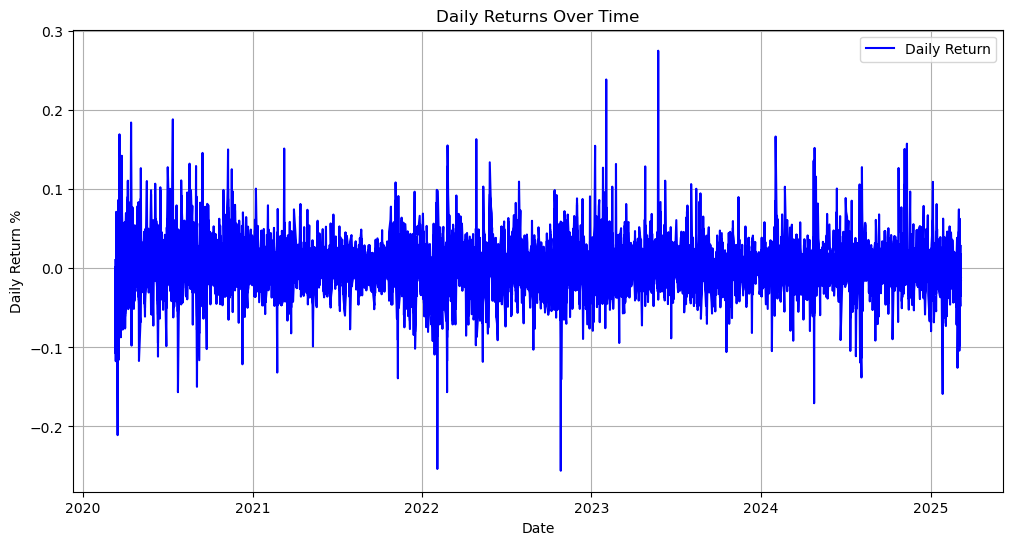

In [46]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
plt.figure(figsize=(12, 6))
plt.plot(stock_data_engineered['Date'], stock_data_engineered['Daily_Return'], label='Daily Return', color='blue')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return %')
plt.legend()
plt.grid()
plt.show()

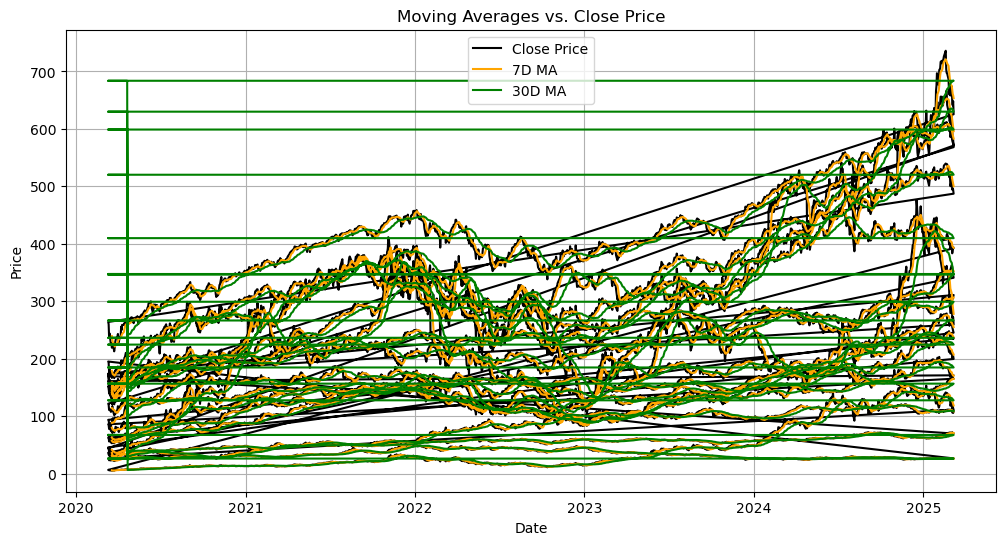

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data_engineered['Date'],stock_data_engineered['Close'], label='Close Price', color='black')
plt.plot(stock_data_engineered['Date'], stock_data_engineered['7D_MA'], label='7D MA', color='orange')
plt.plot(stock_data_engineered['Date'], stock_data_engineered['30D_MA'], label='30D MA', color='green')
plt.title('Moving Averages vs. Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()